<a href="https://colab.research.google.com/github/StivenVB/Parcial-1-Sistemas-Inteligentes-II/blob/main/NaiveBayesParcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import io
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler

# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb


#Métricas
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

Cargar y leer información del dataset

In [61]:
from google.colab import files
import io
archivo=files.upload()
dataframe=pd.read_csv(io.BytesIO(archivo['dataset2.csv']),delimiter=",")

Saving dataset2.csv to dataset2.csv


Revisar si el dataframe contiene nulos

In [62]:
dataframe.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

Información del dataframe

In [63]:
dataframe.info() # información

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

Visualizar algunas filas del dataframe

In [64]:
dataframe.head(15)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,1,0,0,121,...,44,7800,5.2,1,1,0,1,0,0,1
1,7,50,1.020,4,0,?,1,0,0,?,...,38,6000,?,0,0,0,1,0,0,1
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,?,0,1,0,0,0,1,1
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,0,0,0,1,1,1
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,0,0,1,0,0,1
5,60,90,1.015,3,0,?,?,0,0,74,...,39,7800,4.4,1,1,0,1,1,0,1
6,68,70,1.010,0,0,?,1,0,0,100,...,36,?,?,0,0,0,1,0,0,1
7,24,?,1.015,2,4,1,0,0,0,410,...,44,6900,5,0,1,0,1,1,0,1
8,52,100,1.015,3,0,1,0,1,0,138,...,33,9600,4,1,1,0,1,0,1,1
9,53,90,1.020,2,0,0,0,1,0,70,...,29,12100,3.7,1,1,0,0,0,1,1


Imputación de los datos

In [65]:
# Lista de columnas numéricas
columnas_numericas = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

# Reemplaza cadenas vacías y '?' por 0 en las columnas numéricas
dataframe = dataframe.replace(['', '?'], 0)

# Convierte las columnas a tipo numérico
dataframe[columnas_numericas] = dataframe[columnas_numericas].apply(pd.to_numeric, errors='coerce')

for column in dataframe[columnas_numericas]:
  media = dataframe[column].mean()
  dataframe[column] = dataframe[column].fillna(media)
  dataframe[column] = dataframe[column].replace(0, media)

categoricos = [col for col in dataframe.columns if dataframe[col].dtype == 'object']

# Itera a través de las columnas y reemplaza los '?' y cadenas vacías por el valor que más se repite en cada columna
for column in categoricos:
    most_frequent_value = dataframe[column].mode()[0]  # Encuentra el valor más frecuente
    dataframe[column] = dataframe[column].replace(0, most_frequent_value)

Obtener datos básicos

In [66]:
dataframe.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.457313,76.400250,1.003361,1.451250,0.729762,146.245275,57.296155,3.066905,131.022784,4.403285,12.314740,37.659394,7815.802500,4.202533,0.625000
std,16.975838,13.481993,0.038916,0.960367,0.914751,74.956438,49.289311,5.617552,15.407223,2.851219,2.770967,8.568101,2708.430129,1.109466,0.484729
min,2.000000,50.000000,0.897863,0.900000,0.395000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,42.000000,70.000000,1.010000,0.900000,0.395000,101.000000,27.000000,0.900000,124.000000,3.609250,10.873500,31.982500,6178.500000,3.165750,0.000000
50%,54.000000,77.087500,1.015000,0.900000,0.395000,126.000000,44.000000,1.400000,136.000000,4.050000,12.000000,37.000000,6900.000000,4.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.395000,150.000000,61.750000,2.941875,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


Verificar distribuciones de probabilidad de las columnas numéricas

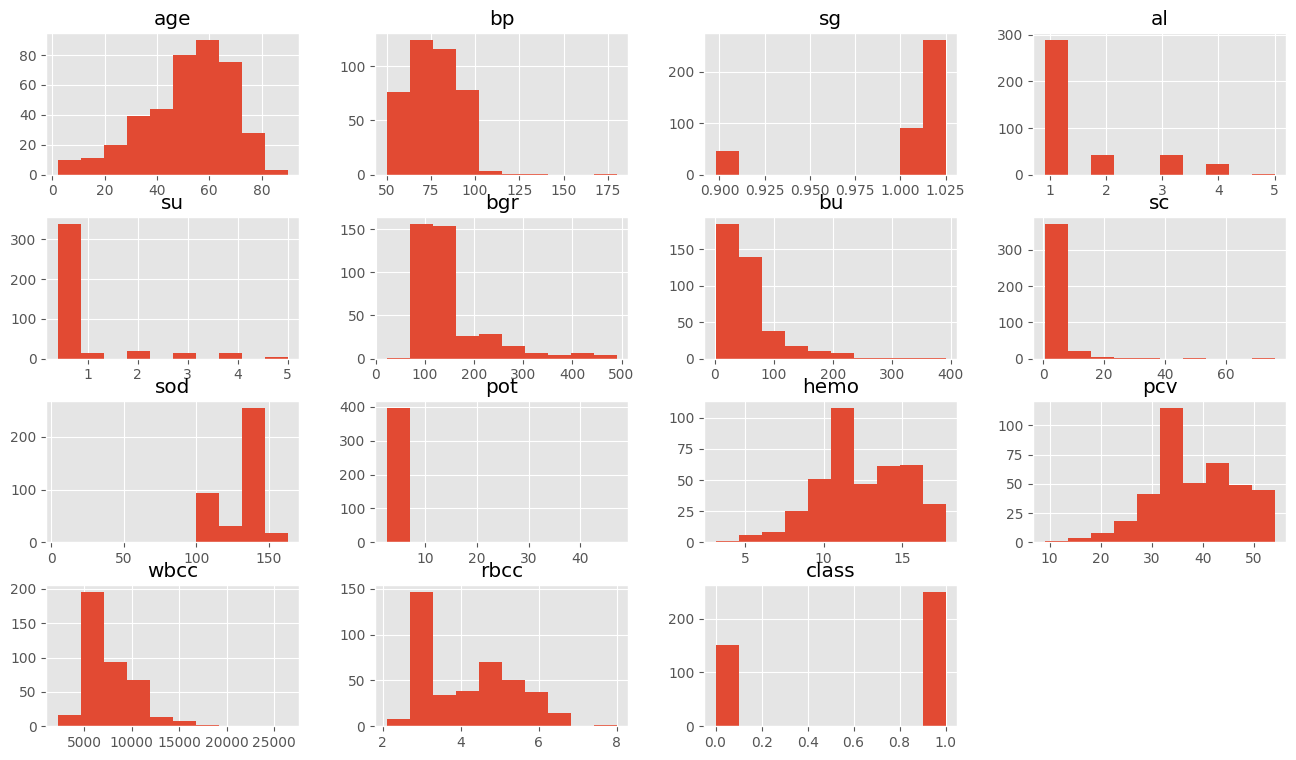

In [67]:
numerico = dataframe.select_dtypes(np.number)
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
numerico.hist()
plt.show()

Se usará la prueba de Agostino para comprobar

In [68]:
normal=[]
noNormal=[]
for i in numerico:
  datosColumna = numerico[i]
  stat,p=normaltest(datosColumna)
  if p > 0.5:
    normal.append(i)
  else:
    noNormal.append(i)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",noNormal)

Con distribucion normal:  []
Sin distribucion normal:  ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'class']


Correlación de columnas numéricas

<Axes: title={'center': 'Chronic Kidney'}>

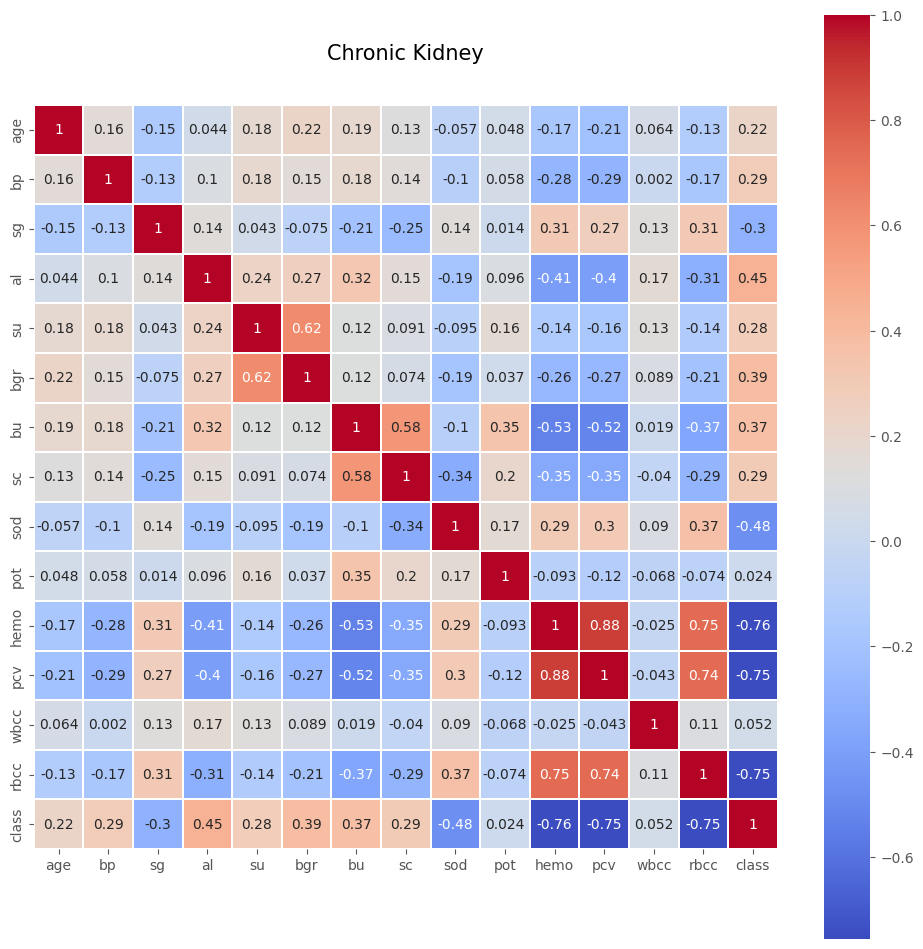

In [69]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
plt.title('Chronic Kidney', y=1.05, size=15)
sb.heatmap(numerico.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Histogramas de datos categoricos

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


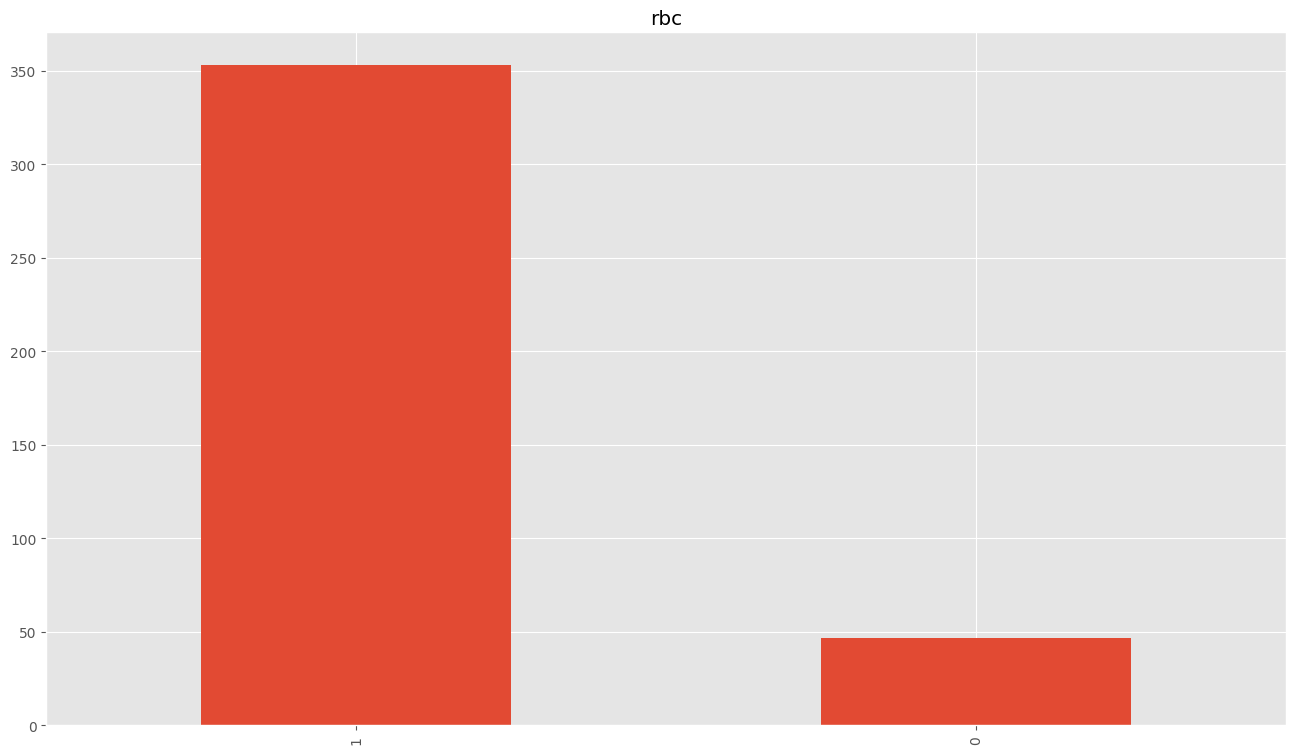

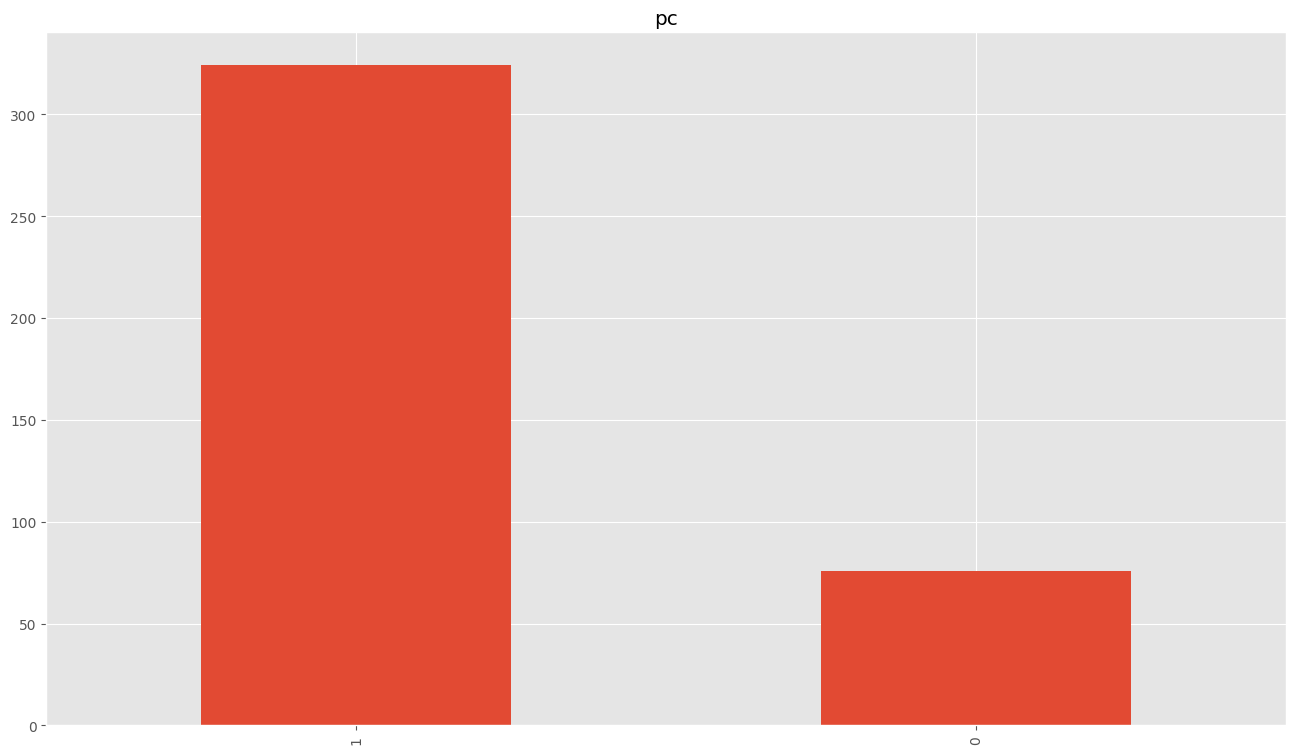

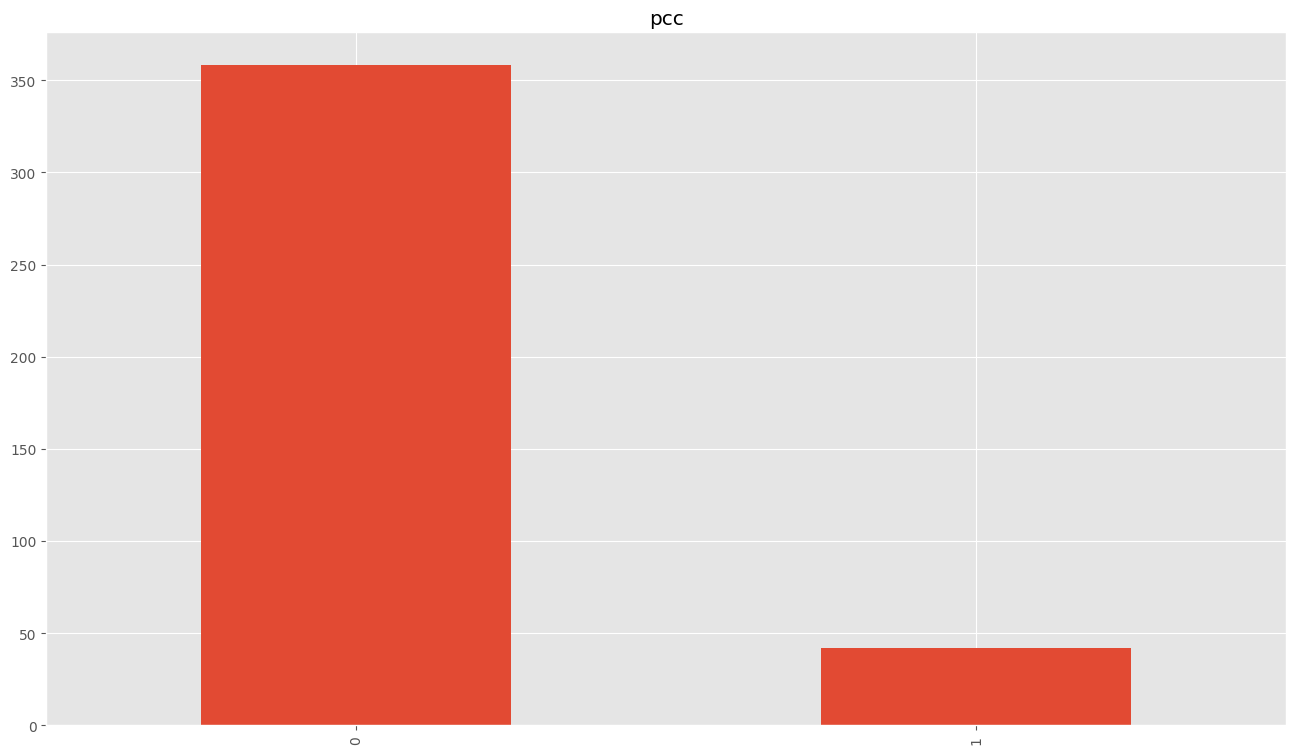

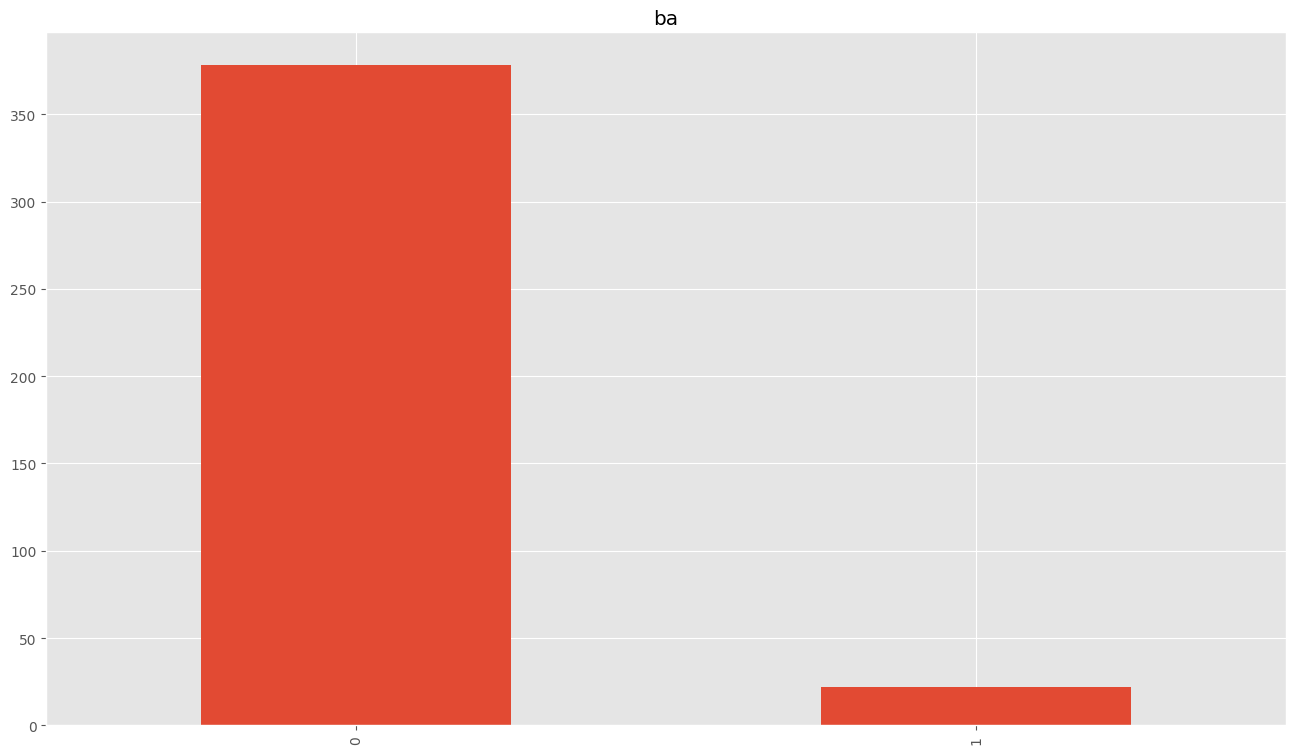

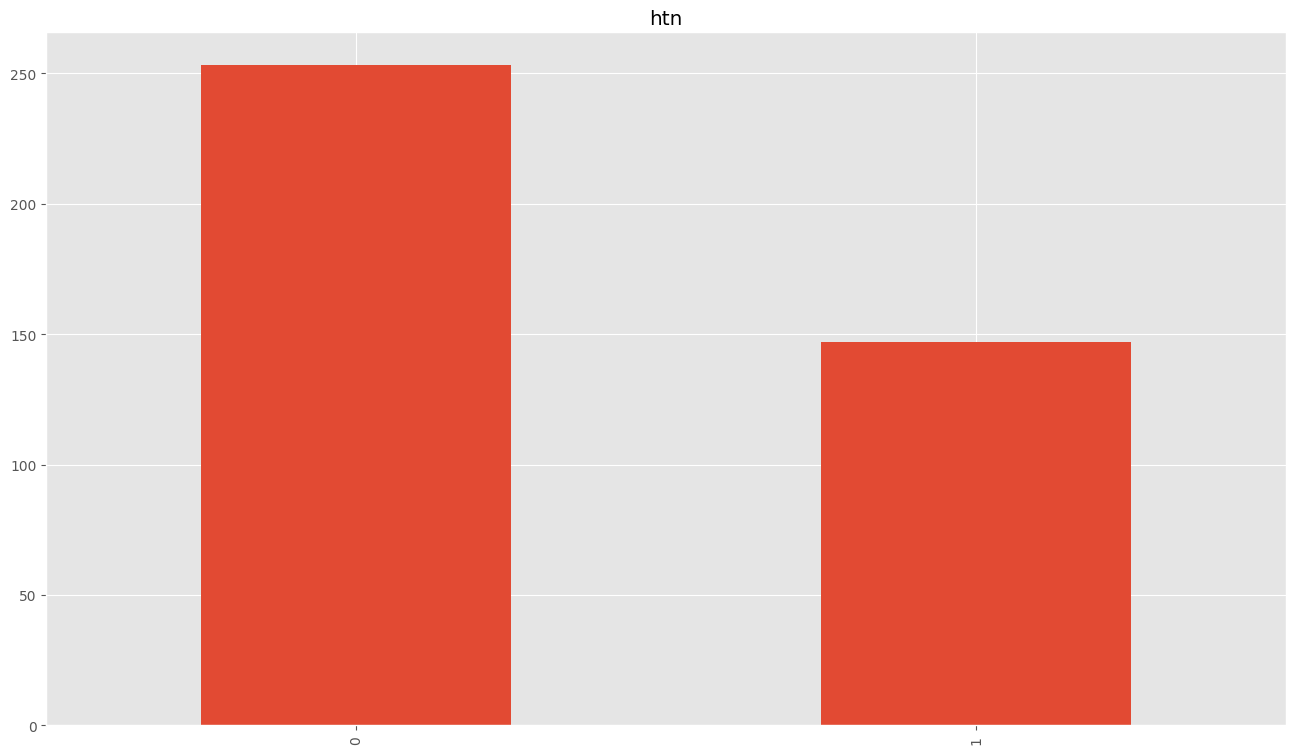

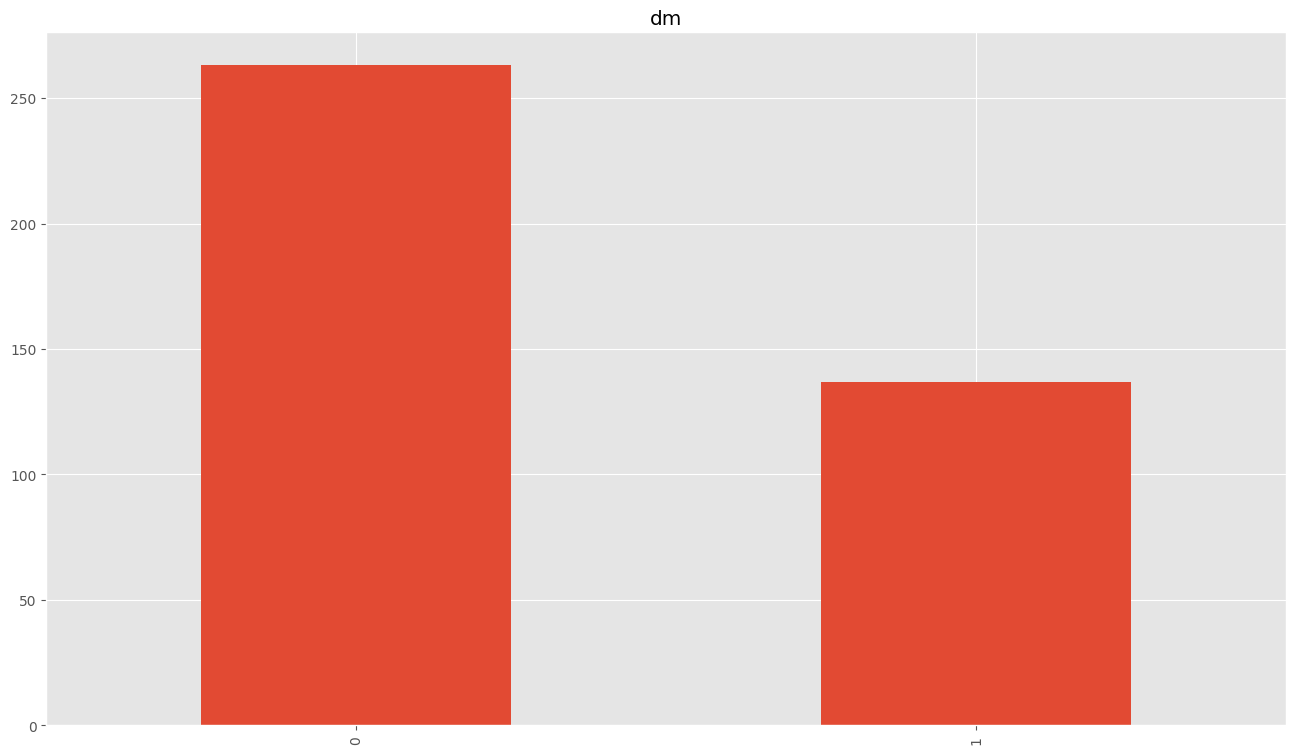

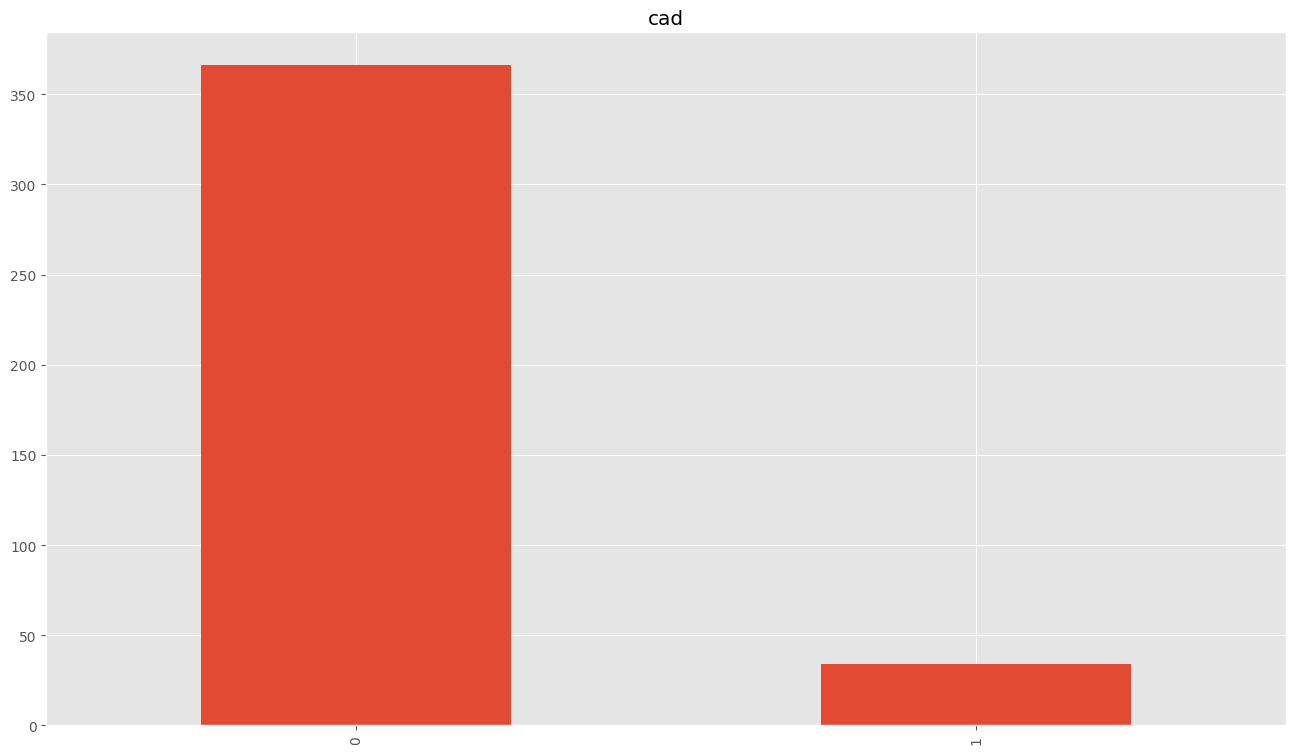

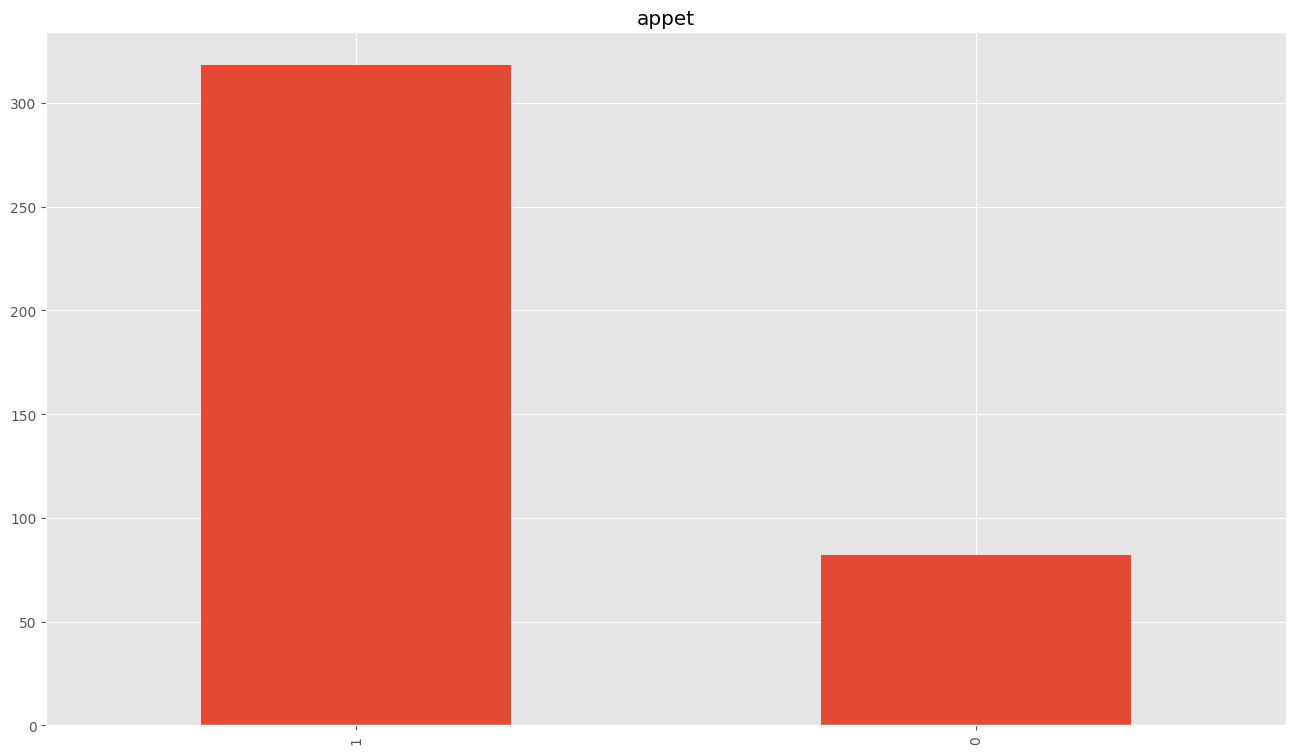

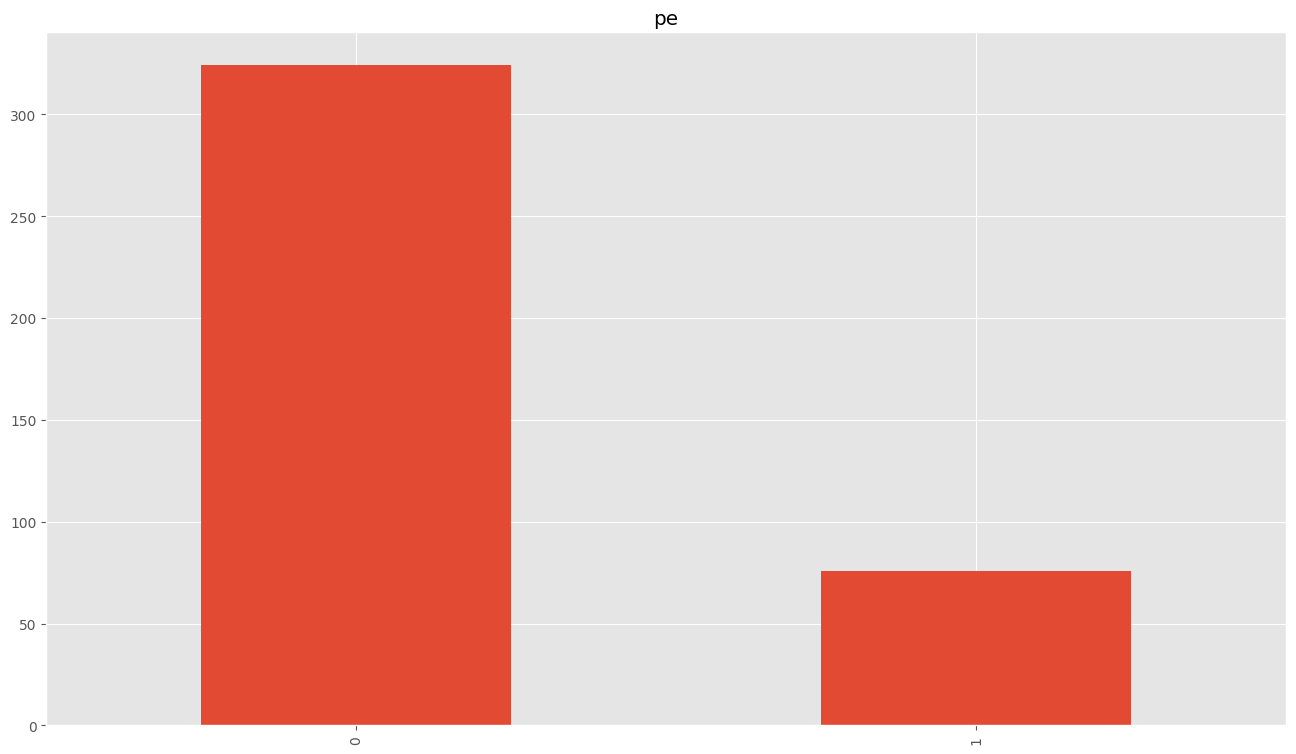

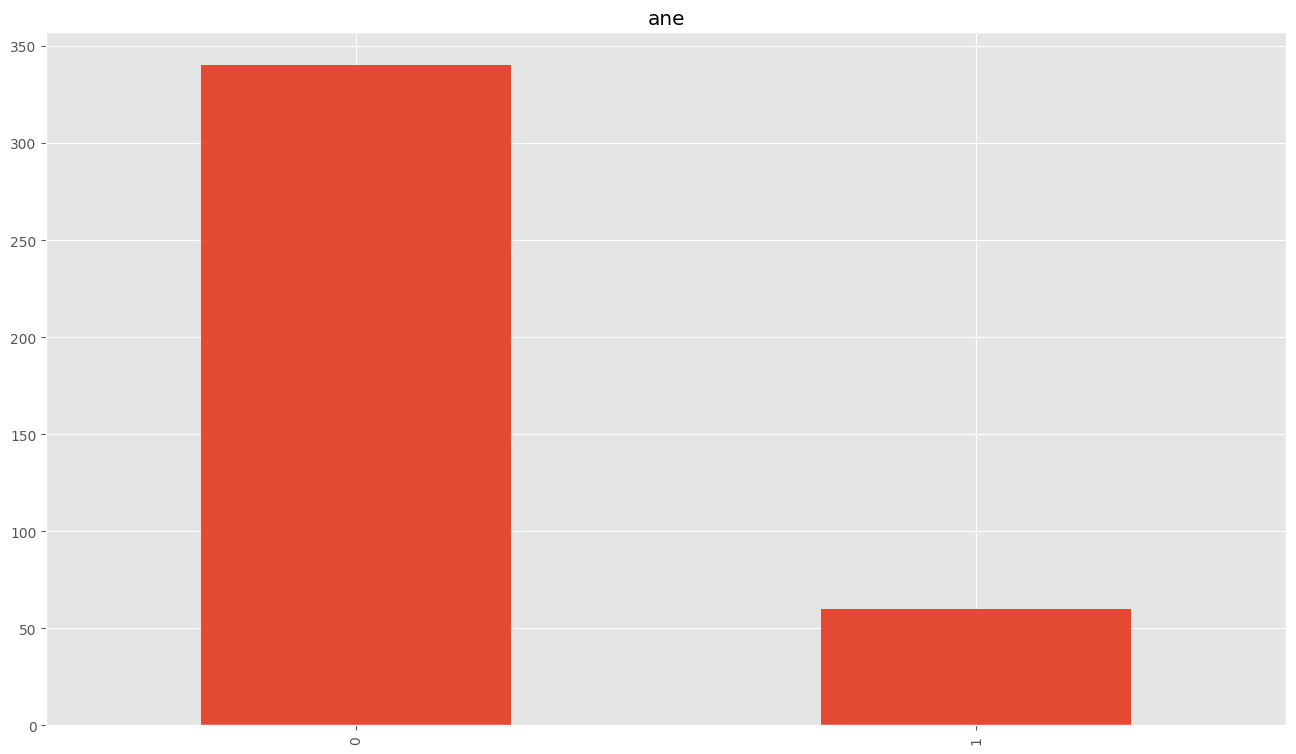

In [70]:
categoricos = [col for col in dataframe.columns if dataframe[col].dtype == 'object' and col!= 'class'] # obteniendo los datos categoricos
print(categoricos)

# Mostrar los gráficos de barras para cada columna categórica
for col in categoricos:
      fig, ax = plt.subplots()
      dataframe[col].value_counts().plot(kind='bar')
      ax.set_title(col)
      plt.show()

Codificar los valores categoricos para que queden en números

In [71]:
encoder=LabelEncoder()
# Obtener columnas a encodificar
cat_colsAll = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
print(cat_colsAll)

for col in cat_colsAll:
        dataframe[col] = encoder.fit_transform(dataframe[col])

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


Dividir los datos

In [72]:
dataNumerica = dataframe.select_dtypes(np.number) # obtener columnas numericas
dataCategorica = dataframe.select_dtypes(object)

Normalizar

In [73]:
escalador=StandardScaler()
dataNumerica2=pd.DataFrame(escalador.fit_transform(dataNumerica), columns = dataNumerica.columns)

In [74]:
dataNumerica2.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.203916,0.267339,0.428090,-0.470461,-0.366418,0.36489,0.484322,-0.342518,-0.241249,-0.337221,...,0.740951,-0.005842,0.900178,1.311903,1.385535,-0.304789,0.507801,-0.484322,-0.420084,0.774597
1,-2.622138,-1.960638,0.428090,2.657258,-0.366418,0.36489,0.484322,-0.342518,-0.241249,-0.193591,...,0.039803,-0.671266,-0.935659,-0.762252,-0.721743,-0.304789,0.507801,-0.484322,-0.420084,0.774597
2,0.621819,0.267339,0.170804,0.572112,2.484917,0.36489,0.484322,-0.342518,-0.241249,3.696831,...,-0.778204,-0.116746,-0.935659,-0.762252,1.385535,-0.304789,-1.969276,-0.484322,2.380476,0.774597
3,-0.203916,-0.475320,0.042160,2.657258,-0.366418,0.36489,-2.064742,2.919556,-0.241249,-0.390652,...,-0.661346,-0.412490,-0.273025,1.311903,-0.721743,-0.304789,-1.969276,2.064742,2.380476,0.774597
4,-0.026973,0.267339,0.170804,0.572112,-0.366418,0.36489,0.484322,-0.342518,-0.241249,-0.537588,...,-0.310772,-0.190682,0.358699,-0.762252,-0.721743,-0.304789,0.507801,-0.484322,-0.420084,0.774597


Modificar datos numéricos

In [75]:
dataNumerica2 = dataNumerica2.round() # redondear los valores
dataNumerica2.head() #visualizar como quedaron los datos

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,1.0,-0.0,1.0,1.0,1.0,-0.0,1.0,-0.0,-0.0,1.0
1,-3.0,-2.0,0.0,3.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,-0.0,1.0,-0.0,-0.0,1.0
2,1.0,0.0,0.0,1.0,2.0,0.0,0.0,-0.0,-0.0,4.0,...,-1.0,-0.0,-1.0,-1.0,1.0,-0.0,-2.0,-0.0,2.0,1.0
3,-0.0,-0.0,0.0,3.0,-0.0,0.0,-2.0,3.0,-0.0,-0.0,...,-1.0,-0.0,-0.0,1.0,-1.0,-0.0,-2.0,2.0,2.0,1.0
4,-0.0,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,-1.0,...,-0.0,-0.0,0.0,-1.0,-1.0,-0.0,1.0,-0.0,-0.0,1.0


In [76]:
dataNumerica2= dataNumerica2.astype(int) # Convertir los valores a enteros
dataNumerica2.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,1,0,0,1
1,-3,-2,0,3,0,0,0,0,0,0,...,0,-1,-1,-1,-1,0,1,0,0,1
2,1,0,0,1,2,0,0,0,0,4,...,-1,0,-1,-1,1,0,-2,0,2,1
3,0,0,0,3,0,0,-2,3,0,0,...,-1,0,0,1,-1,0,-2,2,2,1
4,0,0,0,1,0,0,0,0,0,-1,...,0,0,0,-1,-1,0,1,0,0,1


Unir datos numéricos y categoricos

In [77]:
dataframe = pd.concat([dataNumerica2,dataCategorica], axis = 1) # combinar los datos categóricos y numéricos

Visualizar los datos con los cambios

In [78]:
dataframe.head(15)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,1,0,0,1
1,-3,-2,0,3,0,0,0,0,0,0,...,0,-1,-1,-1,-1,0,1,0,0,1
2,1,0,0,1,2,0,0,0,0,4,...,-1,0,-1,-1,1,0,-2,0,2,1
3,0,0,0,3,0,0,-2,3,0,0,...,-1,0,0,1,-1,0,-2,2,2,1
4,0,0,0,1,0,0,0,0,0,-1,...,0,0,0,-1,-1,0,1,0,0,1
5,1,1,0,2,0,0,0,0,0,-1,...,0,0,0,1,1,0,1,2,0,1
6,1,0,0,-1,0,0,0,0,0,-1,...,0,-1,-1,-1,-1,0,1,0,0,1
7,-2,0,0,1,4,0,-2,0,0,4,...,1,0,1,-1,1,0,1,2,0,1
8,0,2,0,2,0,0,-2,3,0,0,...,-1,1,0,1,1,0,1,0,2,1
9,0,1,0,1,0,-3,-2,3,0,-1,...,-1,2,0,1,1,0,-2,0,2,1


Asignación de variables para X y Y

In [79]:
#dataframe.dropna(subset=['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'], inplace=True)
X=dataframe.drop(["class"],axis=1) # obtener valores de x
y=dataframe["class"] # valores de y
print(X.shape)
print(X)
print("----")
print(y.shape)
print(y)

(400, 24)
     age  bp  sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv  wbcc  rbcc  \
0      0   0   0   0   0    0   0    0   0    0  ...     1    1     0     1   
1     -3  -2   0   3   0    0   0    0   0    0  ...     0    0    -1    -1   
2      1   0   0   1   2    0   0    0   0    4  ...    -1   -1     0    -1   
3      0   0   0   3   0    0  -2    3   0    0  ...     0   -1     0     0   
4      0   0   0   1   0    0   0    0   0   -1  ...     0    0     0     0   
..   ...  ..  ..  ..  ..  ...  ..  ...  ..  ...  ...   ...  ...   ...   ...   
395    0   0   0  -1   0    0   0    0   0    0  ...     1    1     0     1   
396   -1   0   1  -1   0    0   0    0   0   -1  ...     2    2     0     2   
397   -2   0   0  -1   0    0   0    0   0   -1  ...     1    1     0     1   
398   -2  -1   1  -1   0    0   0    0   0    0  ...     1    2     0     2   
399    0   0   1  -1   0    0   0    0   0    0  ...     1    2     0     2   

     htn  dm  cad  appet  pe  ane  
0    

Buscar el mejor valor de suavizado para reducir o eliminar overfitting y underfitting

In [80]:
# definimos el modelo
modelo = GaussianNB()

# valores de probar
alphas = {'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# obtener el mejor valor por validación cruzada
grid = GridSearchCV(estimator=modelo, param_grid=alphas, cv=5)

# ajustamos el modelo a los datos
grid.fit(X, y)

print(f"El mejor valor de var_smoothing es: {grid.best_params_['var_smoothing']}")
print(f'Precisión media en validación cruzada: {grid.best_score_}')

El mejor valor de var_smoothing es: 1e-09
Precisión media en validación cruzada: 0.9649999999999999


PARTICIÓN DE DATOS 80% 20%

In [81]:
XTrainNaive,XTestNaive,yTrainNaive,yTestNaive=train_test_split(X,y,test_size=0.2, random_state=2)

Implementación modelo

In [82]:
modeloNaive=GaussianNB(var_smoothing=1e-09)
modeloNaive.fit(XTrainNaive,yTrainNaive)
yPredictNaive=modeloNaive.predict(XTestNaive)
print(yPredictNaive)

[ 1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1
  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1 -1  1 -1
 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1
  1 -1  1 -1  1  1 -1  1]


Identificar overfitting o underfitting del modelousando Vaidación Cruzada

In [83]:
scores = cross_val_score(modeloNaive, X, y, cv=5)

# calcular la media y la desviación estándar de las puntuaciones de precisión
meanScore = np.mean(scores)
stdScore = np.std(scores)

# hacer predicciones en los datos de entrenamiento y prueba
yPredTrain = modeloNaive.predict(XTrainNaive)
yPredTest = modeloNaive.predict(XTestNaive)

# calcular la precisión en los datos de entrenamiento y prueba
accuracyTrain = accuracy_score(yTrainNaive, yPredTrain)
accuracyTest = accuracy_score(yTestNaive, yPredTest)

print("Precisión en los datos de entrenamiento:", accuracyTrain)
print("Precisión en los datos de prueba:", accuracyTest)

# imprimir las puntuaciones de precisión y sus estadísticas
print('Puntuaciones de precisión:', scores.mean())
print('Precisión media:', meanScore)
print('Desviación estándar de la precisión:', stdScore)

Precisión en los datos de entrenamiento: 0.965625
Precisión en los datos de prueba: 0.9625
Puntuaciones de precisión: 0.9649999999999999
Precisión media: 0.9649999999999999
Desviación estándar de la precisión: 0.02549509756796393


Matriz de confusión

[[26  0]
 [ 3 51]]


<Axes: >

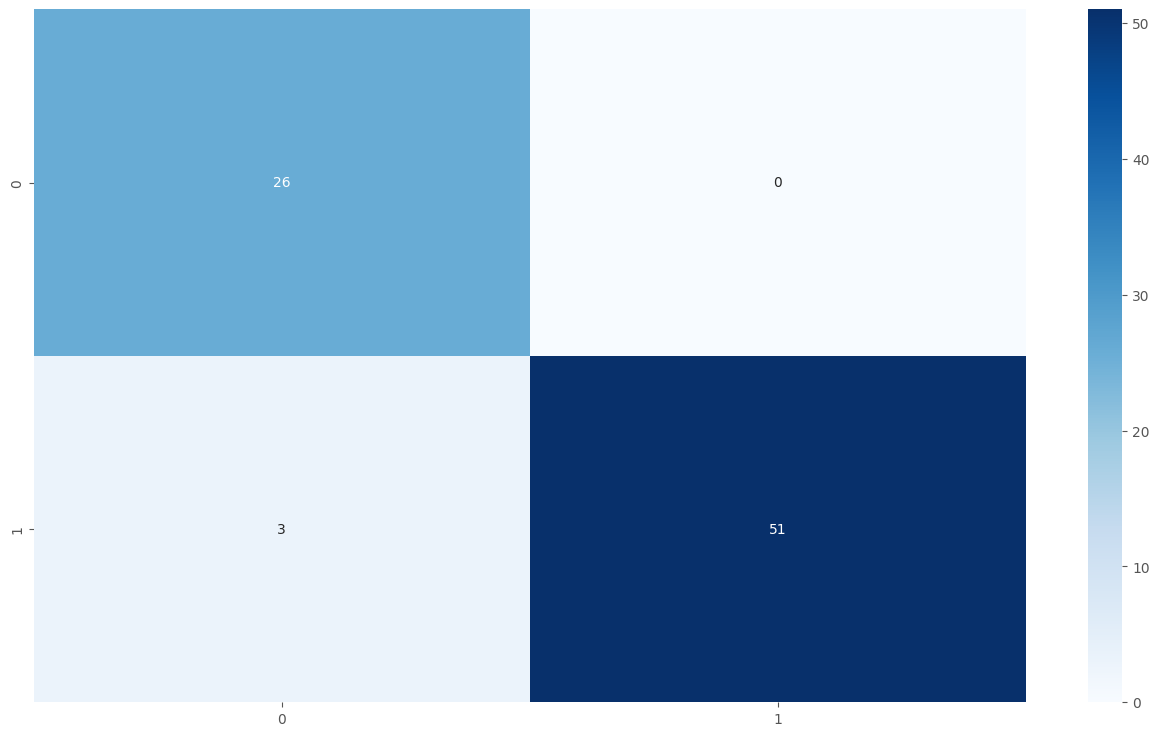

In [84]:
matrizNaive=confusion_matrix(yTestNaive,yPredictNaive)
print(matrizNaive)
sb.heatmap(matrizNaive,annot=True,cmap="Blues")

Significado valores matriz de confusión

In [85]:
vp = matrizNaive[0,0]
fp = matrizNaive[0,1]
fn = matrizNaive[1,0]
vn = matrizNaive[1,1]
# número de clientes de una población estudiada que suscribirán un depósito a plazo que el modelo predice correctamente
print("Verdaderos Positivos = ", vp)
# número de clientes de una población estudiada que suscribirán un deposito a largo plazo que el modelo predijo de manera erronea
print("Falsos Positivos = ", fp)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera erronea.
print("Falsos Negativos = ", fn)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera correcta.
print("Verdaderos Negativos = ", vn)

Verdaderos Positivos =  26
Falsos Positivos =  0
Falsos Negativos =  3
Verdaderos Negativos =  51


Evaluación capacidad de clasificación correcta del modelo

In [86]:
# Calculamos la sensibilidad y especificidad
sensibilidad = vp / (vp + fn) # O  también conocida como recall
especificidad = vn / (vn + fp) # capacidad del modelo  para detectar correctamente los negativos
print('Sensibilidad:', sensibilidad)
print('Especificidad:', especificidad)

Sensibilidad: 0.896551724137931
Especificidad: 1.0


Métricas

In [87]:
precision_recall_fscore_support(yTestNaive,yPredictNaive,average=None, zero_division=True)
etiquetas=["yes","no"]
print(classification_report(yTestNaive,yPredictNaive,target_names=etiquetas, zero_division=True))
acc_nb = accuracy_score(y_true=yTestNaive, y_pred=yPredictNaive)

              precision    recall  f1-score   support

         yes       0.90      1.00      0.95        26
          no       1.00      0.94      0.97        54

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [88]:
accuracy = accuracy_score(yTestNaive, yPredictNaive) # proporción de predicciones correctas del modelo
precision = precision_score(yTestNaive,yPredictNaive, average = 'weighted',zero_division= True ) # proporción de predicciones positivas que fueron correctas
recall = recall_score(yTestNaive, yPredictNaive, average = 'weighted', zero_division= True) # proporción de positivos reales que se identificaron correctamente
f1 = f1_score(yTestNaive, yPredictNaive, average = 'weighted') # medida armónica de precision y recall
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9625
Precision: 0.9663793103448276
Recall: 0.9625
F1 Score: 0.962987012987013


PARTICIPACIÓN 75% 25%

In [89]:
XTrainNaive2,XTestNaive2,yTrainNaive2,yTestNaive2=train_test_split(X,y,test_size=0.3, random_state=2, stratify=y)

Implementación modelo

In [90]:
modeloNaive2=GaussianNB(var_smoothing=1e-09)
modeloNaive2.fit(XTrainNaive2,yTrainNaive2)
yPredictNaive2=modeloNaive2.predict(XTestNaive2)
print(yPredictNaive2)

[-1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1
  1  1  1 -1  1 -1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1 -1  1  1  1
  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1 -1 -1  1
 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1]


Identificar overfitting o underfitting en el modelo usando Validación cruzada

In [91]:
scores = cross_val_score(modeloNaive2, X, y, cv=5)

# calcular la media y la desviación estándar de las puntuaciones de precisión
meanScore = np.mean(scores)
stdScore = np.std(scores)

# hacer predicciones en los datos de entrenamiento y prueba
yPredTrain = modeloNaive2.predict(XTrainNaive2)
yPredTest = modeloNaive2.predict(XTestNaive2)

# calcular la precisión en los datos de entrenamiento y prueba
accuracyTrain = accuracy_score(yTrainNaive2, yPredTrain)
accuracyTest = accuracy_score(yTestNaive2, yPredTest)

print("Precisión en los datos de entrenamiento:", accuracyTrain)
print("Precisión en los datos de prueba:", accuracyTest)

# imprimir las puntuaciones de precisión y sus estadísticas
print('Puntuaciones de precisión:', scores.mean())
print('Precisión media:', meanScore)
print('Desviación estándar de la precisión:', stdScore)

Precisión en los datos de entrenamiento: 0.9714285714285714
Precisión en los datos de prueba: 0.95
Puntuaciones de precisión: 0.9649999999999999
Precisión media: 0.9649999999999999
Desviación estándar de la precisión: 0.02549509756796393


Métricas

Matriz de confusión

[[45  0]
 [ 6 69]]


<Axes: >

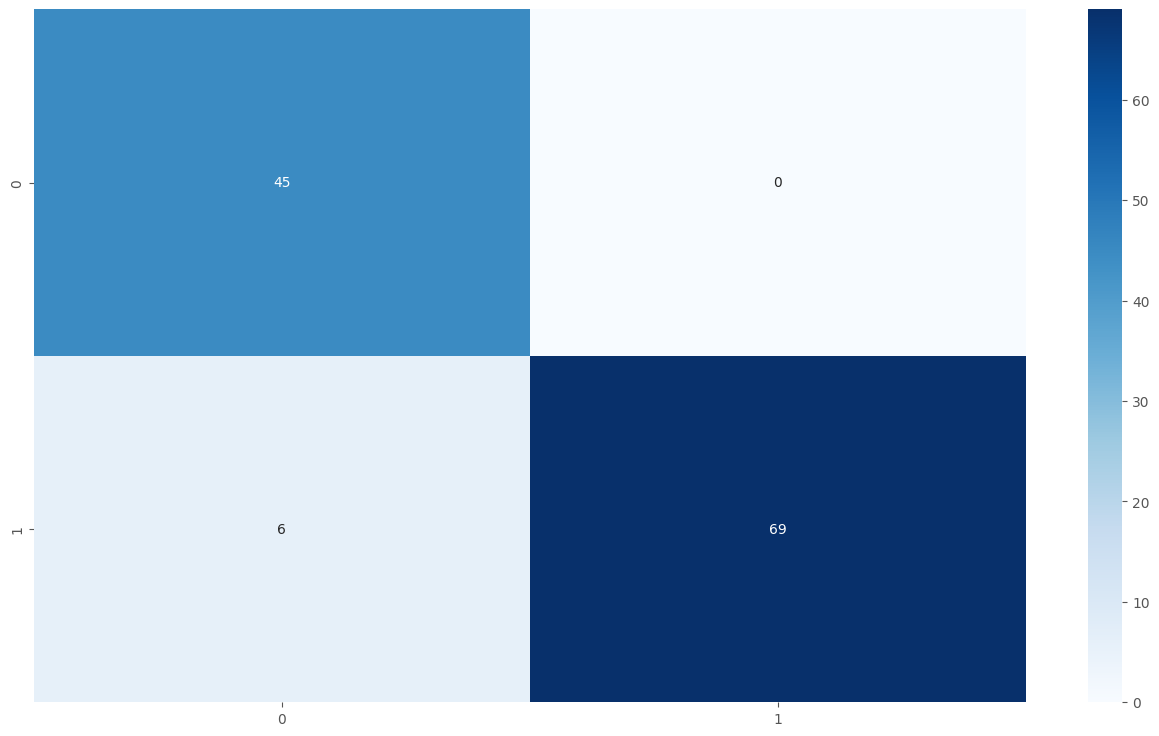

In [92]:
matrizNaive2=confusion_matrix(yTestNaive2,yPredictNaive2)
print(matrizNaive2)
sb.heatmap(matrizNaive2,annot=True,cmap="Blues")

Significado valores matriz de confusión

In [93]:
vp = matrizNaive2[0,0]
fp = matrizNaive2[0,1]
fn = matrizNaive2[1,0]
vn = matrizNaive2[1,1]
# número de clientes de una población estudiada que suscribirán un depósito a plazo que el modelo predice correctamente
print(f'Verdaderos Positivos =  {vp}')
# número de clientes de una población estudiada que suscribirán un deposito a largo plazo que el modelo predijo de manera erronea
print(f'Falsos Positivos =  {fp}')
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera erronea.
print(f'Falsos Negativos = {fn}')
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera correcta.
print(f'Verdaderos Negativos = {vn}')

Verdaderos Positivos =  45
Falsos Positivos =  0
Falsos Negativos = 6
Verdaderos Negativos = 69


Evaluación capacidad de clasificación correcta del modelo

In [94]:
# Calculamos la sensibilidad y especificidad
sensibilidad = vp / (vp + fn) # O  también conocida como recall
especificidad = vn / (vn + fp) # capacidad del modelo  para detectar correctamente los negativos
print(f'Sensibilidad: {sensibilidad}')
print(f'Especificidad: {especificidad}')

Sensibilidad: 0.8823529411764706
Especificidad: 1.0


Resumen de métricas

In [95]:
precision_recall_fscore_support(yTestNaive2,yPredictNaive2,average=None)
etiquetas=["yes","no"]
print(classification_report(yTestNaive2,yPredictNaive2,target_names=etiquetas))

              precision    recall  f1-score   support

         yes       0.88      1.00      0.94        45
          no       1.00      0.92      0.96        75

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120



In [96]:
accuracy = accuracy_score(yTestNaive2, yPredictNaive2) # proporción de predicciones correctas del modelo
precision = precision_score(yTestNaive2, yPredictNaive2, average = 'weighted') # proporción de predicciones positivas que fueron correctas
recall = recall_score(yTestNaive2, yPredictNaive2, average = 'weighted') # proporción de positivos reales que se identificaron correctamente
f1 = f1_score(yTestNaive2, yPredictNaive2, average = 'weighted') # medida armónica de precision y recall
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(type(f1.item()))

Accuracy: 0.95
Precision: 0.9558823529411764
Recall: 0.95
F1 Score: 0.9505208333333334
<class 'float'>


**Conclusión**

Es mejor el modelo 1 debido a que tiene mayor precisión, lo que significa que es capaz de tener un mayor porcentaje de predicciones positivas correctas